<a href="https://colab.research.google.com/github/seanzhu815/402/blob/main/Assignment3_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3 Sample Code

### Import Modules

In [270]:
import pandas            as pd   
import numpy             as np   
import scipy             as scp  
import matplotlib.pyplot as plt  
import os                as os   
from datetime import date as dd  # for dates
from scipy import optimize
from scipy import stats
import statsmodels.api as sm


# Part 1

In [271]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [272]:
merger_data = pd.ExcelFile('drive/MyDrive/Merger data.xlsx')
sheet_names = merger_data.sheet_names
firm_names = sheet_names[1:len(sheet_names)]
car_all_firm = pd.DataFrame(data=range(-25,26),columns=['Event time']) #store abnormal return

In [273]:
#calculate car
# %%
for i in range(0,len(firm_names)):
  firm_data_i = merger_data.parse(firm_names[i])
  Event_time = firm_data_i.columns[3]
  firm_data_i['r'] =  (firm_data_i['Price']-firm_data_i['Price'].shift(1))/firm_data_i['Price'].shift(1)
  firm_data_i['rm'] = (firm_data_i['SP500']-firm_data_i['SP500'].shift(1))/firm_data_i['SP500'].shift(1)
  pre_event_interval = (firm_data_i[Event_time]<=-26)&(firm_data_i[Event_time]>=-125)
  pre_event_regression_data = firm_data_i.loc[pre_event_interval,['r','rm']] 
      # estimate alpha and beta
  mod = sm.OLS(pre_event_regression_data['r'],sm.add_constant(pre_event_regression_data['rm']))                                                                # Fill the model for the regression
  res = mod.fit()
  res.summary()
  alpha = res.params[0]
  beta = res.params[1]
    # abnormal return
  firm_data_i['abnormal_r'] = firm_data_i['r'] - alpha - beta*firm_data_i['rm']   
  event_window = (firm_data_i[Event_time]<=25)&(firm_data_i[Event_time]>=-25)
  car_i = firm_data_i.loc[event_window,['abnormal_r']].cumsum()
  car_all_firm[firm_names[i]] = car_i.values

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

### Q 1.1:

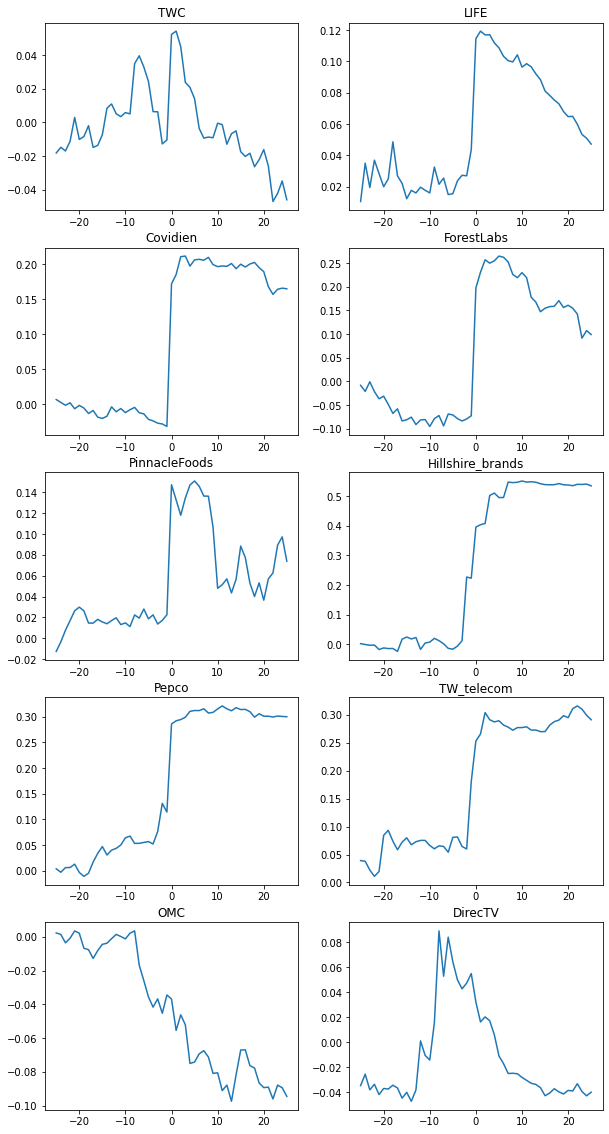

In [274]:
#plot car
fig, axs = plt.subplots(5, 2 ,figsize=(10,20))
for i in range(0,len(firm_names)):
    yind = i%2
    xind = int((i-yind)/2)
    axs[xind,yind].plot(car_all_firm['Event time'],car_all_firm[firm_names[i]])
    axs[xind,yind].set_title(firm_names[i])

plt.savefig('car_all_firm.png',bbox_inches='tight') #save image

### Q 1.2:

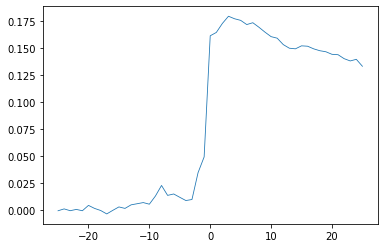

<Figure size 432x288 with 0 Axes>

In [275]:
#plot average car
car_all_firm['average_car'] = (np.sum(car_all_firm,axis=1)- car_all_firm['Event time'])/10                                          # calculate the average CAR
plt.plot(car_all_firm['Event time'], car_all_firm['average_car'] , linewidth = .8)
plt.show()
plt.savefig('car_average_firm.png',bbox_inches='tight') #save image

# Part 2

In [276]:
em_data = pd.read_excel('drive/MyDrive/Emerging markets.xlsx')                       
em_data.columns.values[0] = "date"
em_data

,date,Mkt-RF,RF,SMALL LoBM,SMALL HiBM,BIG LoBM,BIG HiBM,Unnamed: 7,SMB,HML
0,198907,0.60,0.70,-17.69,14.94,-1.51,-3.09,NaN,-0.39,15.53
1,198908,1.63,0.74,14.74,4.39,2.68,5.56,NaN,8.78,-3.73
2,198909,14.41,0.65,27.55,10.02,17.43,19.57,NaN,3.32,-7.70
3,198910,-2.18,0.68,1.96,-5.02,-1.18,-2.92,NaN,-0.49,-4.36
4,198911,0.72,0.69,-3.80,4.71,0.76,-3.31,NaN,0.43,2.22
...,...,...,...,...,...,...,...,...,...,...
392,202203,-1.57,0.00,-2.19,0.18,-3.54,-0.10,NaN,0.45,2.90
393,202204,-5.26,0.00,-7.12,-2.39,-6.20,-3.95,NaN,0.55,3.49
394,202205,0.26,0.03,-0.79,-1.84,1.12,0.47,NaN,-1.54,-0.85
395,202206,-6.77,0.06,-7.64,-5.62,-4.85,-8.87,NaN,0.13,-1.00


### Q 2.1:

In [277]:
small_Hibm_mean = 12*em_data.loc[:,'SMALL HiBM'].mean()                                  # Fill the appropriate columns
big_Lobm_mean = 12*em_data.loc[:,'BIG LoBM'].mean()                                    # Fill the appropriate columns
print(f'Annualized average return for small value stocks is {small_Hibm_mean:.3} percent' )
print(f'Annualized average return for large growth stocks is {big_Lobm_mean:.4} percent' )

Annualized average return for small value stocks is 17.1 percent
Annualized average return for large growth stocks is 8.346 percent


In [283]:
premium_bm = small_Hibm_mean- big_Lobm_mean                       # Caluclate the differnce between the 2 returns
print(f'Annualized average return for the premium is {premium_bm:.4} percent' )
T = em_data.shape[0]
excess_bm = em_data['SMALL HiBM']- em_data['BIG LoBM']                  #time series of excess returns
tstats_bm = scp.stats.ttest_ind(excess_bm, np.zeros(T))
tstats_bm

Annualized average return for the premium is 8.726 percent


Ttest_indResult(statistic=4.023363887718462, pvalue=6.287064802876803e-05)

### Q 2.2: Do this yourself

In [279]:

big_Hibm_mean = 12*em_data.loc[:,'BIG HiBM'].mean()                                    # Fill the appropriate columns

print(f'Annualized average return for large growth stocks is {big_Hibm_mean:.4} percent' )

Annualized average return for large growth stocks is 12.55 percent


In [281]:
premium_bm1 =big_Hibm_mean- big_Lobm_mean                       # Caluclate the differnce between the 2 returns
print(f'Annualized average return for the premium is {premium_bm1:.4} percent' )

excess_bm1 = em_data['SMALL HiBM']- em_data['BIG HiBM']                  #time series of excess returns
tstats_bm1 = scp.stats.ttest_ind(excess_bm1,np.zeros(T))
tstats_bm1

Annualized average return for the premium is 4.199 percent


Ttest_indResult(statistic=2.200349998038696, pvalue=0.028070096019784434)

### Q 2.3:

In [284]:
mod = sm.OLS(em_data['SMALL HiBM']-em_data['RF'],sm.add_constant(em_data['Mkt-RF']))
res = mod.fit()
res.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     1623.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):          5.63e-142
Time:                        07:15:13   Log-Likelihood:                -968.30
No. Observations:                 397   AIC:                             1941.
Df Residuals:                     395   BIC:                             1949.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6066      0.140      4.322      0.000       0.331       0.882
Mkt-RF         0.9357      0.023     40.288      0.000       0.890       0.981
==============================================================================
Omnibus:                      102.422   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              511.680
Skew:                           1.003   Prob(JB):                    7.76e-112
Kurtosis:                       8.188   Cond. No.                         6.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [286]:
talpha =  res.tvalues[0]                      # Calculate the tstat of the intercept
beta =    res.params[1]                         # Calcuate the market beta
tbeta =   res.tvalues[1]                         # Calculate the tstat of the market beta
print(f'The tstat for the alpha is {talpha:.4}' )
print(f'The value of beta is {beta:.4}' )
print(f'The tstat for the beta is {tbeta:.4}' )

The tstat for the alpha is 4.322
The value of beta is 0.9357
The tstat for the beta is 40.29


Repeat the same for BIG LoBM

In [287]:
mod = sm.OLS(em_data['BIG LoBM']-em_data['RF'],sm.add_constant(em_data['Mkt-RF']))
res = mod.fit()
res.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     5509.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):          4.35e-234
Time:                        07:19:43   Log-Likelihood:                -732.62
No. Observations:                 397   AIC:                             1469.
Df Residuals:                     395   BIC:                             1477.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1312      0.078     -1.692      0.091      -0.284       0.021
Mkt-RF         0.9522      0.013     74.226      0.000       0.927       0.977
==============================================================================
Omnibus:                       20.966   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.534
Skew:                          -0.054   Prob(JB):                     7.16e-14
Kurtosis:                       4.910   Cond. No.                         6.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [288]:
talpha =  res.tvalues[0]                      # Calculate the tstat of the intercept
beta =    res.params[1]                         # Calcuate the market beta
tbeta =   res.tvalues[1]                         # Calculate the tstat of the market beta
print(f'The tstat for the alpha is {talpha:.4}' )
print(f'The value of beta is {beta:.4}' )
print(f'The tstat for the beta is {tbeta:.4}' )

The tstat for the alpha is -1.692
The value of beta is 0.9522
The tstat for the beta is 74.23


### Q 2.4: Do this yourself

In [295]:
factors=em_data[['Mkt-RF','SMB','HML']]
mod = sm.OLS(em_data['SMALL HiBM']-em_data['RF'],sm.add_constant(factors))
res = mod.fit()
res.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     2884.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):          3.59e-267
Time:                        07:29:31   Log-Likelihood:                -669.54
No. Observations:                 397   AIC:                             1347.
Df Residuals:                     393   BIC:                             1363.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0335      0.068      0.491      0.624      -0.101       0.168
Mkt-RF         0.9715      0.011     86.259      0.000       0.949       0.994
SMB            0.8064      0.029     28.222      0.000       0.750       0.863
HML            0.5959      0.023     25.536      0.000       0.550       0.642
==============================================================================
Omnibus:                       91.409   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              915.224
Skew:                           0.640   Prob(JB):                    1.83e-199
Kurtosis:                      10.327   Cond. No.                         6.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [296]:
talpha =  res.tvalues[0]                     
beta =    res.params[1]                        
tbeta =   res.tvalues[1] 
tbeta2=res.tvalues[2] 
tbeta3=res.tvalues[3]                     
print(f'The tstat for the alpha is {talpha:.4}' )
print(f'The value of beta is {beta:.4}' )
print(f'The tstat for the beta is {tbeta:.4}' )
print(f'The tstat for the beta2 is {tbeta2:.4}' )
print(f'The tstat for the beta3 is {tbeta3:.4}' )

The tstat for the alpha is 0.4906
The value of beta is 0.9715
The tstat for the beta is 86.26
The tstat for the beta2 is 28.22
The tstat for the beta3 is 25.54


In [297]:
mod = sm.OLS(em_data['BIG LoBM']-em_data['RF'],sm.add_constant(factors))
res = mod.fit()
res.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     3582.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):          6.17e-285
Time:                        07:31:37   Log-Likelihood:                -605.63
No. Observations:                 397   AIC:                             1219.
Df Residuals:                     393   BIC:                             1235.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1232      0.058      2.118      0.035       0.009       0.238
Mkt-RF         0.9622      0.010    100.357      0.000       0.943       0.981
SMB           -0.1020      0.024     -4.192      0.000      -0.150      -0.054
HML           -0.3672      0.020    -18.484      0.000      -0.406      -0.328
==============================================================================
Omnibus:                       27.966   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.426
Skew:                          -0.226   Prob(JB):                     2.82e-19
Kurtosis:                       5.227   Cond. No.                         6.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [298]:
talpha =  res.tvalues[0]                     
beta =    res.params[1]                        
tbeta =   res.tvalues[1] 
tbeta2=res.tvalues[2] 
tbeta3=res.tvalues[3]                     
print(f'The tstat for the alpha is {talpha:.4}' )
print(f'The value of beta is {beta:.4}' )
print(f'The tstat for the beta is {tbeta:.4}' )
print(f'The tstat for the beta2 is {tbeta2:.4}' )
print(f'The tstat for the beta3 is {tbeta3:.4}' )

The tstat for the alpha is 2.118
The value of beta is 0.9622
The tstat for the beta is 100.4
The tstat for the beta2 is -4.192
The tstat for the beta3 is -18.48
